# Topology Optimization of a metalens

## Running the TopOpt problem

This is a code to test the Topology optimization feature for the metalens problem.

First, we import the main modules to be used:

In [1]:
import numpy as np
from solver import freq_top_opt_2D

Then, we set the plotting for notebooks:

In [2]:
%matplotlib inline

Finally, we can choose to enable or disable the warnings:

In [3]:

verbose = False
if not verbose:
    import warnings
    warnings.filterwarnings("ignore")

Next, we can set our simulation and optimization parameters and initialize the solver.

In [4]:
r = 0.5 # mesh refinement factor
scaling =  1e-9/r # the scale applied to the physical problem
fR = int(6*r) #int(r*3) # value for the filtering radius   
nElx = int(r*200) + 2*fR #400 # the number of elements in the X axis
nEly = int(r*100) + 2*fR #200 # the number of elements in the Y axis
tElmIdx = [int(r*100)+ fR, int(r*40)+ fR] #[200,100] # the target element for the optimization of the FOM
thickness = int(r*10) #15 # the thickness of the design region, in number of elements in the Y direction
limit = int(np.floor((nEly-2*fR)*9/10))+fR # the lower limit of the design region, 0.9 * total height of the simulation volume
dVElmIdx = np.array([np.arange(limit-thickness,limit),np.arange(fR,nElx-fR)])  # the indexes of the domain of the  design variables

DVini = 0.0 * np.ones(len(dVElmIdx[0])*len(dVElmIdx[1])) # the initial value / guess for the design parameters
#np.random.seed(42)
#DVini = np.random.rand(len(dVElmIdx[0])*len(dVElmIdx[1]))

thickness_part = int(r*35)
height_part = int(r*35)
dVElmIdx_part = np.array([np.arange(tElmIdx[1]-height_part//2,tElmIdx[1]+height_part//2),np.arange(tElmIdx[0]-thickness_part//2,tElmIdx[0]+thickness_part//2)])  # the indexes of the domain of the  design variables
dVElmIdx_part_pad = np.array([np.arange(tElmIdx[1]-height_part//2-fR,tElmIdx[1]+height_part//2+fR),np.arange(tElmIdx[0]-thickness_part//2-fR,tElmIdx[0]+thickness_part//2+fR)])  # the indexes of the domain of the  design variables

DVini_part = 1 * np.ones(len(dVElmIdx_part[0])*len(dVElmIdx_part[1])) # the initial value / guess for the design parameters


#DVini_part = np.random.rand(len(dVElmIdx_part[0])*len(dVElmIdx_part[1]))
eps = 4 # value of the dielectric function
eps_part = 4 # value of the dielectric function of the particle
part_shape = "design" # shape of the particle
part_size = int(r*10) # the size of the particle
wl = int(r*35)  #35  # value for the wavelentgth, i.e. 35 nm.
maxItr = 500 # number of iterations performed by the optimizer
alg = "MMA" # algorithm: Method of  Moving Asymptotes
eta = 0.5
beta = 1E99
solver = freq_top_opt_2D( tElmIdx,
                          dVElmIdx,
                          dVElmIdx_part,
                          dVElmIdx_part_pad,
                          nElx, 
                          nEly,
                          DVini,
                          DVini_part,  
                          eps, 
                          wl,  
                          fR,
                          eta, 
                          beta,
                          scaling,
                          part_shape,
                          part_size,
                          eps_part
                        )

In [5]:
print(part_size)

5


In [6]:
print(tElmIdx)

[53, 23]


In [7]:
print("Particle size", part_size*scaling)
print("Wavelength", wl*scaling)
print("Element size", scaling)
print("Size X", scaling*nElx)
print("Size Y", scaling*nEly)
print(int(np.floor(nEly*1/10)))
print("Size membrane", scaling*20)

Particle size 1e-08
Wavelength 3.4e-08
Element size 2e-09
Size X 2.1200000000000002e-07
Size Y 1.1200000000000001e-07
5
Size membrane 4e-08


FOM:  (1120572047672.316+0j)
Elapsed time in iteration: 0 min 3 s
----------------------------------------------


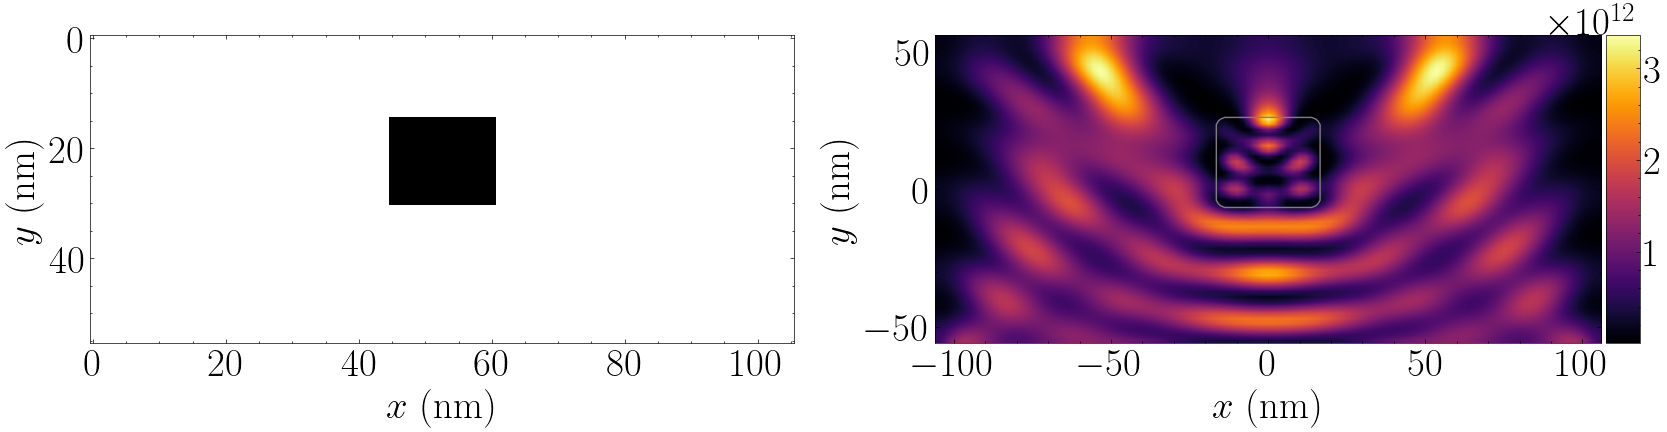

1785425.4050169215


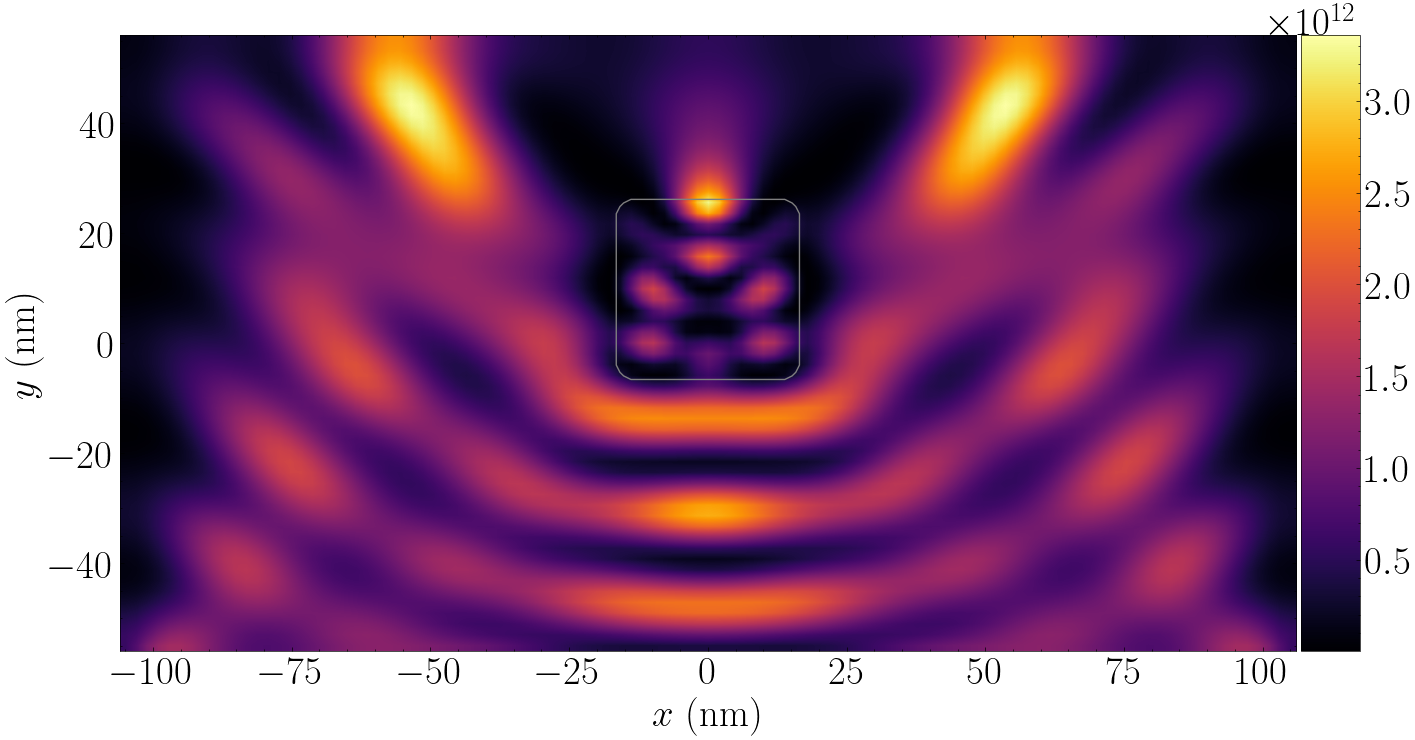

In [8]:
dVs = DVini
dVs_part = DVini_part 
Ez, FOM = solver.solve_forward(dVs, dVs_part)

7047.542777629829


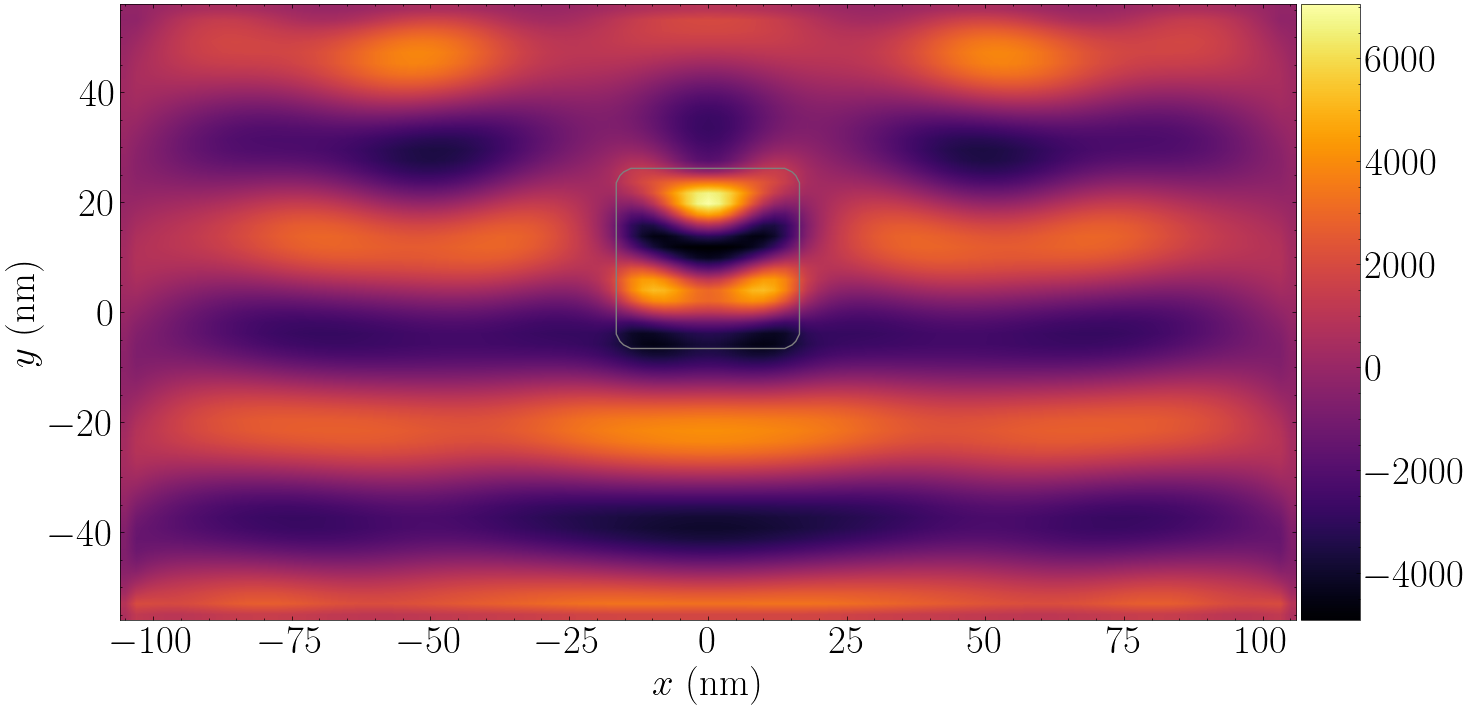

In [9]:
solver.plot_H_field(comp="x")

3203.804257191422


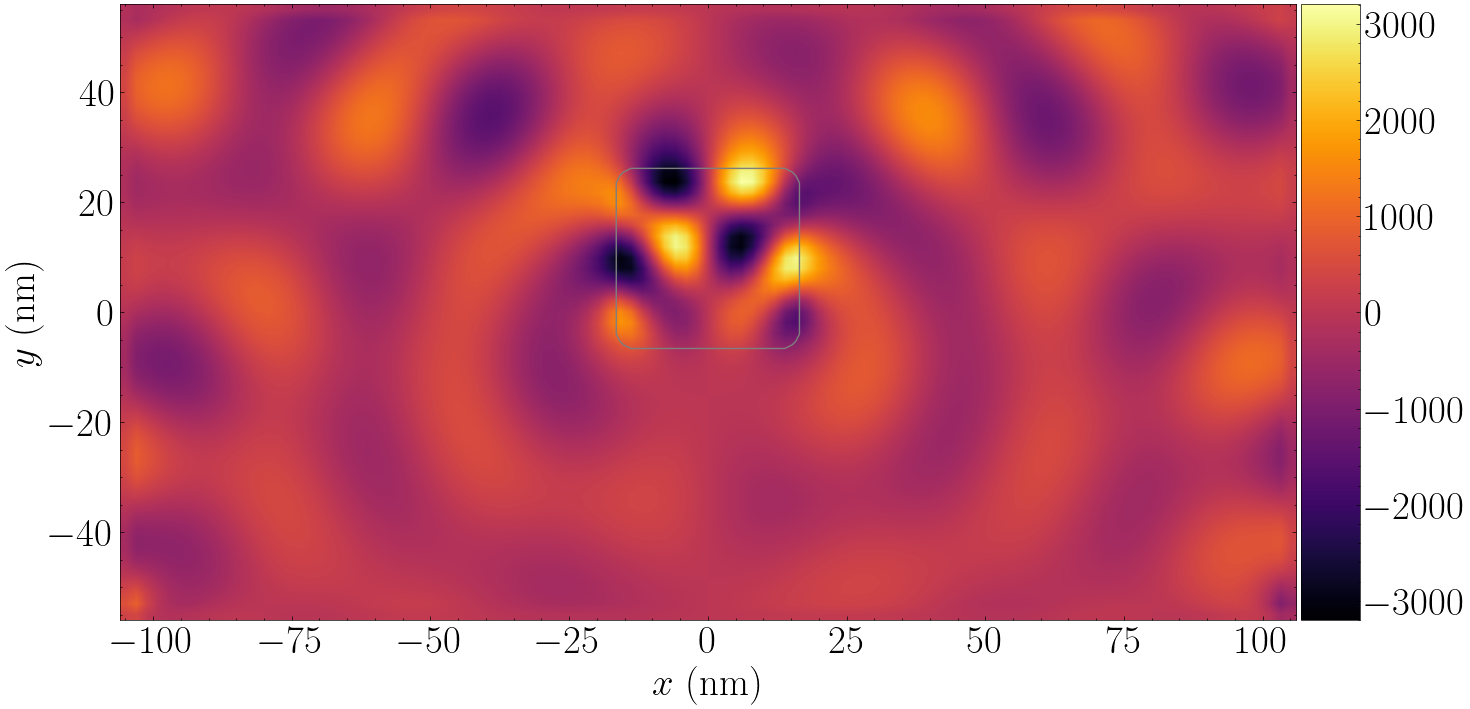

In [10]:
solver.plot_H_field(comp="y")

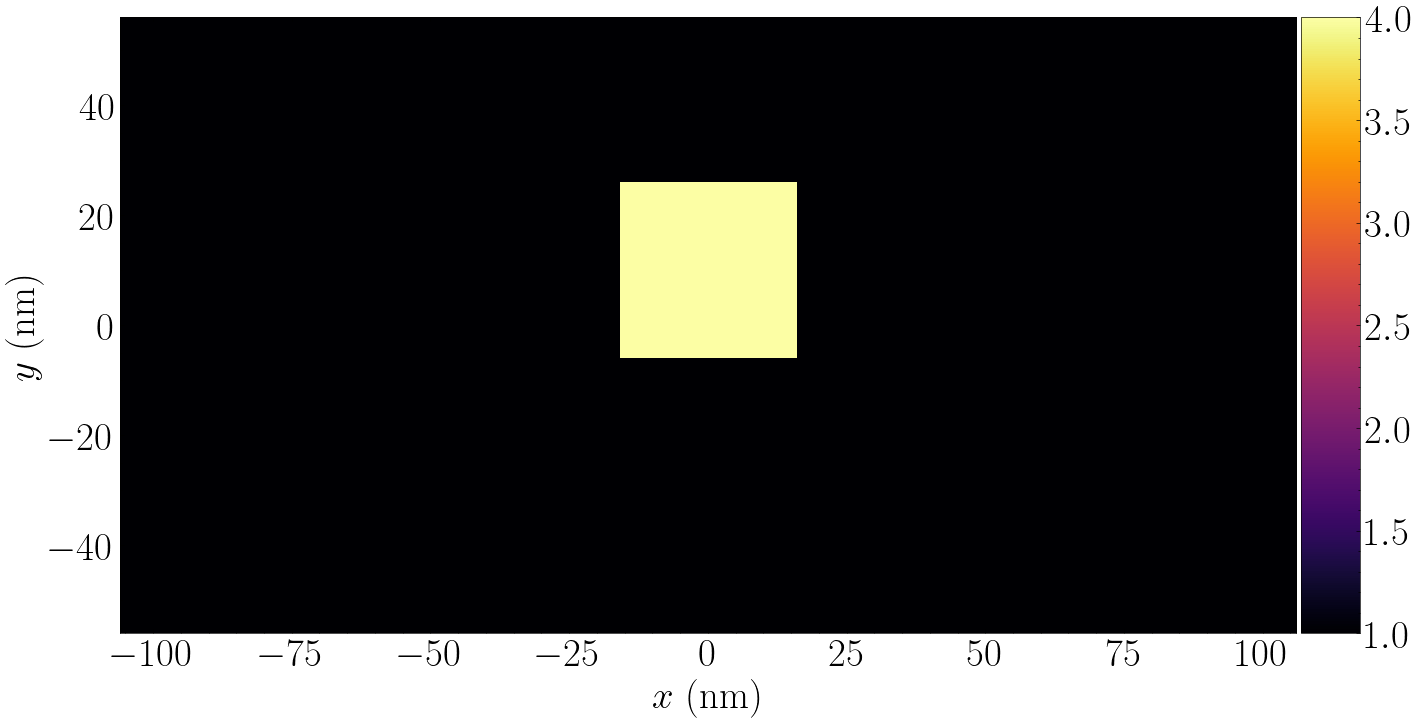

In [11]:
solver.plot_material_interpolation()

In [12]:
#raise()

In [13]:
solver.calculate_forces()
raise()

Fx:  (1.7597034940308732e-22+0j)
Fy:  (1.6808580715084738e-07+0j)


TypeError: exceptions must derive from BaseException

In [ ]:
T = solver.solve_heat(dVs, obj="lens")

In [ ]:
T = solver.solve_heat(dVs_part, obj="part")

In [ ]:
#solver.plot_material_interpolation_heat()

In [ ]:
solver.calculate_forces()

In [ ]:
#raise()

We call the solver to solve the Topology Optimization problem.

In [ ]:
dVs_tot = solver.optimize(maxItr, alg)

In [ ]:
print(solver.beta)

In [ ]:
print(solver.alpha)

In [ ]:
dVs = solver.dVs
dVs_part = solver.dVs_part

In [ ]:
raise()

In [ ]:
dVs_tot = np.concatenate([dVs.flatten(), dVs_part.flatten()])
np.save("designs/new_test.npy",dVs_tot)

In [ ]:
import matplotlib.pyplot as plt

fig, ax = plt.subplots(figsize=(14,10))
ax.plot(solver.opt.FOM_it, label="cost-function")
ax.plot(solver.opt.cons_1_it, label="Lens connectivity")
ax.plot(solver.opt.cons_2_it, label="Particle connectivity")
print(solver.opt.cons_2_it)
ax.legend()
fig

In [ ]:
fig, ax = plt.subplots(figsize=(14,10))
i = 0
for lam in solver.opt.lam_array:
    print(i)
    ax.plot(lam, label=str(i))
    i+=1
ax.legend()
fig

In [ ]:
solver.calculate_forces()

In [ ]:
Ez, FOM = solver.solve_forward(dVs, dVs_part)

## Probing the dipole approximation: How does the field look without the particle?

In [ ]:
eps_part = 4 # value of the dielectric function of the particle
beta_new =  1000
solver = freq_top_opt_2D( tElmIdx,
                          dVElmIdx,
                          dVElmIdx_part,
                          nElx, 
                          nEly,
                          DVini,
                          DVini_part,  
                          eps, 
                          wl,  
                          fR,
                          eta, 
                          beta_new,
                          scaling,
                          part_shape,
                          part_size,
                          eps_part
                        )

In [ ]:
Ez, FOM = solver.solve_forward(dVs, dVs_part)

In [ ]:
solver.calculate_forces()

In [ ]:
raise()

## Appendix: Sensitivity calculations

It is also possible to plot the sensitivities after each one of the forward solutions. Here we will just show you the last one:

In [ ]:
dVs = DVini
dVs_part = DVini_part 

Ez, FOM = solver.solve_forward(dVs, dVs_part)

In [ ]:
sens1 = solver.plot_sensitivities(which="part")
print(np.max(sens1.flatten()))
print(np.min(sens1.flatten()))

In [ ]:
sens2 = solver.sens_check_part(dVs_part)
print(np.max(sens2.flatten()))
print(np.min(sens2.flatten()))

In [ ]:
#sens1 = sens1 / np.max(np.abs(sens1))
#sens2 = sens2 / np.max(np.abs(sens2))

In [ ]:
import matplotlib.pyplot as plt
from mpl_toolkits.axes_grid1 import make_axes_locatable
sens_error = sens1.flatten() + sens2
fig, ax = plt.subplots(figsize=(14,10))
divider = make_axes_locatable(ax)
cax = divider.append_axes('right', size='5%', pad=0.05)

im = ax.imshow(np.reshape(np.real(sens_error), np.shape(solver.part_domain)), cmap='inferno')
fig.colorbar(im, cax=cax, orientation='vertical')
ax.set_title("Absolute error of sensitivities")
ax.set_xlabel('$x (nm)$')
ax.set_ylabel('$y (nm)$')
fig

In [ ]:
import matplotlib.pyplot as plt
from mpl_toolkits.axes_grid1 import make_axes_locatable

sens_error = sens1.flatten() - sens2
fig, ax = plt.subplots(figsize=(14,10))
divider = make_axes_locatable(ax)
cax = divider.append_axes('right', size='5%', pad=0.05)

im = ax.imshow(np.reshape(np.real(np.abs(sens_error)/np.max(sens1)), np.shape(solver.part_domain)), cmap='inferno')
fig.colorbar(im, cax=cax, orientation='vertical')
ax.set_title("Relative error of sensitivities")
ax.set_xlabel('$x (nm)$')
ax.set_ylabel('$y (nm)$')
fig

In [ ]:
import matplotlib.pyplot as plt
from mpl_toolkits.axes_grid1 import make_axes_locatable
import matplotlib.colors as mcolors

sens_error = sens1.flatten() - sens2
fig, ax = plt.subplots(figsize=(14,10))
divider = make_axes_locatable(ax)
cax = divider.append_axes('right', size='5%', pad=0.05)

# Compute the logarithmic normalization for color axis
norm = mcolors.LogNorm(vmin=np.real(np.abs(sens_error)/np.max(sens1)).min(), vmax=np.real(np.abs(sens_error)/np.max(sens1)).max())

# Plot the image with logarithmic scale for z-axis
im = ax.imshow(np.reshape(np.real(np.abs(sens_error)/np.max(sens1)), np.shape(solver.part_domain)), cmap='inferno', norm=norm)
fig.colorbar(im, cax=cax, orientation='vertical')
ax.set_title("Relative error of sensitivities")
ax.set_xlabel('$x (nm)$')
ax.set_ylabel('$y (nm)$')

fig